# Generate blacklist for loop calling

In [1]:
import cooler
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
from scipy.sparse import csr_matrix

mpl.style.use('default')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'


In [7]:
chrom_size_path = '/data/ref/mm10/genome/mm10.main20.chrom.sizes'
chrom_sizes = pd.read_csv(chrom_size_path, sep='\t', header=None, index_col=0)


In [4]:
cool = cooler.Cooler('merged_raw/Tan2021.raw.mcool::/resolutions/10000')


In [25]:
data = cool.pixels()[:]
data = csr_matrix((data['count'], (data['bin1_id'], data['bin2_id'])), shape=cool.shape)


In [29]:
bin_df = cool.bins()[:]
bin_df['rowsum'] = data.sum(axis=0).A1

<AxesSubplot:xlabel='rowsum', ylabel='Count'>

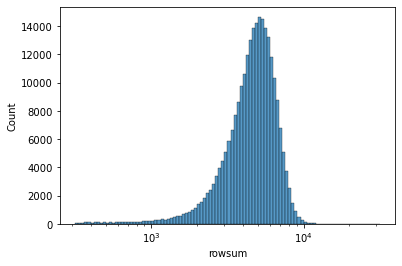

In [39]:
sns.histplot(bin_df.loc[bin_df['rowsum']>0, 'rowsum'], bins=100, log_scale=10, binrange=(2.5,4.5))

In [45]:
((bin_df['rowsum']<1e3)).sum()

23669

In [47]:
bin_df[['chrom', 'start', 'end']].to_csv('mm10.main.10kb.bed', sep='\t', header=False, index=False)
bin_df.loc[bin_df['rowsum']<1e3, ['chrom', 'start', 'end']].to_csv('mm10.main.rowsum1000.10kb.bed', sep='\t', header=False, index=False)
